<a href="https://colab.research.google.com/github/lucerogr/algorithmic-complexity/blob/main/TP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/lmcanavals/algorithmic_complexity.git

In [25]:
from algorithmic_complexity.aclib import graphstuff as gs

In [26]:
import pandas as pd
import numpy as np
import networkx as nx
import math

In [27]:
url="https://raw.githubusercontent.com/lmcanavals/algorithmic_complexity/main/data/poblaciones.csv"
poblaciones=pd.read_csv(url)
print(poblaciones)

     DEPARTAMENTO         PROVINCIA     DISTRITO  ...    LONGITUD NMI1  NMI2
0        AMAZONAS             BAGUA     ARAMANGO  ...   -78.45299  311  1206
1        AMAZONAS             BAGUA     ARAMANGO  ...  -78.444372   44   129
2        AMAZONAS             BAGUA     ARAMANGO  ...   -78.44472   49   179
3        AMAZONAS             BAGUA        BAGUA  ...  -78.495229    3     8
4        AMAZONAS           BONGARA      CUISPES  ...  -77.965302    1     4
...           ...               ...          ...  ...         ...  ...   ...
3752      UCAYALI  CORONEL PORTILLO  YARINACOCHA  ...  -74.621338   54   186
3753      UCAYALI        PADRE ABAD     CURIMANA  ...   -75.08788  119   483
3754      UCAYALI        PADRE ABAD     CURIMANA  ...  -75.082978    9    43
3755      UCAYALI        PADRE ABAD     CURIMANA  ...  -75.089698   29   132
3756      UCAYALI        PADRE ABAD     CURIMANA  ...  -75.087845   62   277

[3757 rows x 8 columns]


In [28]:
print(len(poblaciones))
poblaciones.head()

3757


,DEPARTAMENTO,PROVINCIA,DISTRITO,CENTRO POBLADO,LATITUD,LONGITUD,NMI1,NMI2
0,AMAZONAS,BAGUA,ARAMANGO,EL MUYO (C.P.L.),-5.422545,-78.45299,311,1206
1,AMAZONAS,BAGUA,ARAMANGO,RESERVA UJUCANO,-5.427565,-78.444372,44,129
2,AMAZONAS,BAGUA,ARAMANGO,TUTUMBEROS,-5.327317,-78.44472,49,179
3,AMAZONAS,BAGUA,BAGUA,ALENYA BAJO,-5.682439,-78.495229,3,8
4,AMAZONAS,BONGARA,CUISPES,MITOPAMPA,-5.93856,-77.965302,1,4


In [33]:
nomdepartamentos = poblaciones['DEPARTAMENTO'].unique()
print(len(nomdepartamentos))
nomdepartamentos

25


array(['AMAZONAS', 'ANCASH', 'APURIMAC', 'AREQUIPA', 'AYACUCHO',
       'CAJAMARCA', 'CUSCO', 'DEPARTAMENTO', 'HUANCAVELICA', 'HUANUCO',
       'ICA', 'JUNIN', 'LA LIBERTAD', 'LAMBAYEQUE', 'LIMA', 'LORETO',
       'MADRE DE DIOS', 'MOQUEGUA', 'PASCO', 'PIURA', 'PUNO',
       'SAN MARTIN', 'TACNA', 'TUMBES', 'UCAYALI'], dtype=object)

In [38]:
departamentos = dict()
for nom in nomdepartamentos:
  departamentos[nom] = poblaciones[poblaciones['DEPARTAMENTO'] == nom]
  print(nom, len(departamentos[nom]))

AMAZONAS 25
ANCASH 190
APURIMAC 87
AREQUIPA 80
AYACUCHO 190
CAJAMARCA 97
CUSCO 85
DEPARTAMENTO 1
HUANCAVELICA 89
HUANUCO 139
ICA 111
JUNIN 85
LA LIBERTAD 345
LAMBAYEQUE 817
LIMA 172
LORETO 224
MADRE DE DIOS 5
MOQUEGUA 49
PASCO 43
PIURA 504
PUNO 83
SAN MARTIN 68
TACNA 33
TUMBES 72
UCAYALI 163


In [35]:
nomprovincias = poblaciones['PROVINCIA'].unique()
print(len(nomprovincias))
nomprovincias

157


array(['BAGUA', 'BONGARA', 'CHACHAPOYAS', 'UTCUBAMBA', 'ANTONIO RAYMONDI',
       'BOLOGNESI', 'CARHUAZ', 'CASMA', 'HUARAZ', 'HUARI', 'HUAYLAS',
       'OCROS', 'POMABAMBA', 'RECUAY', 'SANTA', 'SIHUAS', 'YUNGAY',
       'ABANCAY', 'ANDAHUAYLAS', 'ANTABAMBA', 'AYMARAES', 'CHINCHEROS',
       'GRAU', 'AREQUIPA', 'CAMANA', 'CARAVELI', 'CASTILLA', 'CAYLLOMA',
       'CONDESUYOS', 'CANGALLO', 'HUAMANGA', 'HUANCA SANCOS', 'HUANTA',
       'LUCANAS', 'PARINACOCHAS', 'VICTOR FAJARDO', 'CAJABAMBA',
       'CAJAMARCA', 'CELENDIN', 'CHOTA', 'CONTUMAZA', 'CUTERVO', 'JAEN',
       'SAN IGNACIO', 'SAN MARCOS', 'SAN MIGUEL', 'SAN MIMGUEL',
       'SANTA CRUZ', 'ACOMAYO', 'CALCA', 'CANAS', 'CANCHIS',
       'CHUMBIVILCAS', 'LA CONVENCION', 'PARURO', 'QUISPICANCHI',
       'PROVINCIA', 'CASTROVIRREYNA', 'CHURCAMPA', 'HUANCAVELICA',
       'HUAYTARA', 'TAYACAJA', 'AMBO', 'DOS DE MAYO', 'DOSDEMAYO',
       'HUAMALIES', 'HUANUCO SANTA', 'HUANUCO', 'LAURICOCHA',
       'LEONCIO PRADO', 'MARAÑON', 'PUERTO I

In [257]:
provincias = dict()
for nom in nomprovincias:
  provincias[nom] = poblaciones[poblaciones['PROVINCIA'] == nom]
  print(nom, len(provincias[nom]))

BAGUA 4
BONGARA 8
CHACHAPOYAS 1
UTCUBAMBA 12
ANTONIO RAYMONDI 2
BOLOGNESI 5
CARHUAZ 20
CASMA 14
HUARAZ 38
HUARI 20
HUAYLAS 5
OCROS 2
POMABAMBA 21
RECUAY 28
SANTA 22
SIHUAS 6
YUNGAY 7
ABANCAY 41
ANDAHUAYLAS 8
ANTABAMBA 2
AYMARAES 23
CHINCHEROS 12
GRAU 1
AREQUIPA 24
CAMANA 16
CARAVELI 16
CASTILLA 1
CAYLLOMA 20
CONDESUYOS 3
CANGALLO 20
HUAMANGA 3
HUANCA SANCOS 38
HUANTA 7
LUCANAS 92
PARINACOCHAS 1
VICTOR FAJARDO 29
CAJABAMBA 10
CAJAMARCA 13
CELENDIN 16
CHOTA 6
CONTUMAZA 16
CUTERVO 6
JAEN 11
SAN IGNACIO 2
SAN MARCOS 2
SAN MIGUEL 13
SAN MIMGUEL 1
SANTA CRUZ 1
ACOMAYO 14
CALCA 3
CANAS 4
CANCHIS 12
CHUMBIVILCAS 3
LA CONVENCION 13
PARURO 14
QUISPICANCHI 22
PROVINCIA 1
CASTROVIRREYNA 49
CHURCAMPA 1
HUANCAVELICA 6
HUAYTARA 32
TAYACAJA 1
AMBO 37
DOS DE MAYO 7
DOSDEMAYO 1
HUAMALIES 6
HUANUCO SANTA 1
HUANUCO 27
LAURICOCHA 11
LEONCIO PRADO 28
MARAÑON 12
PUERTO INCA 9
CHINCHA 1
ICA 60
NASCA 6
PALPA 30
PISCO 14
CHANCHAMAYO 14
CHUPACA 13
CONCEPCION 1
HUANCAYO 13
JAUJA 1
JUNIN 2
SATIPO 6
TARMA 35
ASCOPE

In [258]:
nomprovincia = input("Ingrese la provincia para mostrar sus distritos: ")
nomdistritos = provincias[nomprovincia]['DISTRITO'].unique()
print("Hay ", len(nomdistritos), " distritos ")
print(" ")
nomdistritos

distritos = dict()
for nom in nomdistritos:
  distritos[nom] = provincias[nomprovincia][provincias[nomprovincia]['DISTRITO'] == nom]
  print(nom, len(distritos[nom]))


Ingrese la provincia para mostrar sus distritos: SATIPO
Hay  2  distritos 
 
COVIRIALI 3
MAZAMARI 3


In [56]:
def dist(cp1, cp2):
  x1, y1 = float(cp1['LATITUD']), float(cp1['LONGITUD'])
  x2, y2 = float(cp2['LATITUD']), float(cp2['LONGITUD'])

  return math.sqrt((x1 - x2)**2 + (y1 - y2)**2)

In [259]:
nomdistrito = input("Ingrese el DISTRITO para mostrar sus CENTROS POBLADOS: ")
distrito = distritos[nomdistrito]

G = nx.Graph()
col = 'CENTRO POBLADO'
for i, cp1 in distrito.iterrows():
  print(cp1[col])
  for j, cp2 in distrito.iterrows():
    if cp1[col] != cp2[col]:
      G.add_edge(cp1[col], cp2[col], weight=dist(cp1, cp2))



Ingrese el DISTRITO para mostrar sus CENTROS POBLADOS: MAZAMARI
ARTURO DURAN PANES Y PASTOR
CIUDAD SATELITE (QUERUBINI)
SAN CRISTOBAL


In [261]:
print(G.nodes)

['ARTURO DURAN PANES Y PASTOR', 'CIUDAD SATELITE (QUERUBINI)', 'SAN CRISTOBAL']


In [263]:

list(G.neighbors('SAN CRISTOBAL'))

['ARTURO DURAN PANES Y PASTOR', 'CIUDAD SATELITE (QUERUBINI)']

In [274]:
def dijkstra(G, s):
    neighbor = ''
    unvisited = []
    visited = []
    total_weight = 0
    current_node = s

    for node in G.nodes:
        if node == s:
            visited.append(s)
        else:
            unvisited.append(node)
    while unvisited:
        for i, neighbor in enumerate(unvisited):
            if i == 0:
                current_weight = G.edges[s, neighbor]['weight']
                current_node = neighbor
            elif G.edges[s, neighbor]['weight'] < current_weight:
                current_weight = G.edges[s, neighbor]['weight']
                current_node = neighbor
        total_weight += current_weight
        unvisited.remove(current_node)
        visited.append(current_node)
    
    total_weight += G.edges[s, current_node]['weight']
    visited.append(s)
    return visited, total_weight

In [288]:
def path_taken():
    dijkstra(G, 'SAN CRISTOBAL')
    shortest_path = []
    shortest_weight = 0

    for i, node in enumerate(G.nodes):
        path, weight = dijkstra(G, node)
        print("")
        print("Ruta", i + 1, "=", path)
        print("Distancia =", weight)
        if i == 0:
            shortest_weight = weight
            shortest_path = path
            
        elif weight < shortest_weight:
            shortest_weight = weight
            shortest_path = path
        
    print('--------------------------------------')
    print("La ruta más corta que visita cada ciudad es:", shortest_path)
    print("La distancia de la ruta es:", shortest_weight)

path_taken()


Ruta 1 = ['ARTURO DURAN PANES Y PASTOR', 'SAN CRISTOBAL', 'CIUDAD SATELITE (QUERUBINI)', 'ARTURO DURAN PANES Y PASTOR']
Distancia = 0.02031753534539294

Ruta 2 = ['CIUDAD SATELITE (QUERUBINI)', 'ARTURO DURAN PANES Y PASTOR', 'SAN CRISTOBAL', 'CIUDAD SATELITE (QUERUBINI)']
Distancia = 0.032951388920751265

Ruta 3 = ['SAN CRISTOBAL', 'ARTURO DURAN PANES Y PASTOR', 'CIUDAD SATELITE (QUERUBINI)', 'SAN CRISTOBAL']
Distancia = 0.03024551129152025
--------------------------------------
La ruta más corta que visita cada ciudad es: ['ARTURO DURAN PANES Y PASTOR', 'SAN CRISTOBAL', 'CIUDAD SATELITE (QUERUBINI)', 'ARTURO DURAN PANES Y PASTOR']
La distancia de la ruta es: 0.02031753534539294


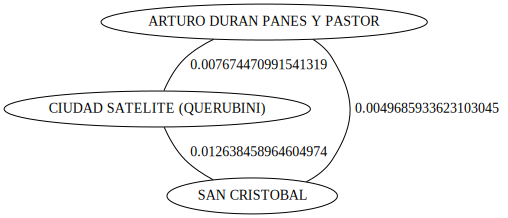

In [286]:
gs.nx2gv(G, weighted=True, params={'size':'10'})